In [38]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Construct the path to your dataset
file_path = Path.home() / "Downloads" / "DataDrivers" / "WIP Users" / "Jasmine_WIP" / "cleaned_salary_data_states.xlsx"

# Load the dataset into memory
salary_data = pd.read_excel(file_path)
print(salary_data.head())  


          CASE_NUMBER CASE_STATUS CASE_RECEIVED_DATE DECISION_DATE  \
0  I-200-14073-248840      denied         2014-03-14    2014-03-21   
1       A-15061-55212      denied         2015-03-19    2015-03-19   
2  I-200-13256-001092      denied         2013-09-13    2013-09-23   
3  I-200-14087-353657      denied         2014-03-28    2014-04-07   
4  I-203-14259-128844      denied         2014-09-16    2014-09-23   

                                       EMPLOYER_NAME  \
0                ADVANCED TECHNOLOGY GROUP USA, INC.   
1                     SAN FRANCISCO STATE UNIVERSITY   
2                                    CAROUSEL SCHOOL   
3  HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...   
4                        SIGNAL SCIENCES CORPORATION   

   PREVAILING_WAGE_SUBMITTED PREVAILING_WAGE_SUBMITTED_UNIT  \
0                  6217100.0                           year   
1                  5067600.0                           year   
2                  4947000.0                         

Job Sub-category Wage Analysis:
JOB_TITLE_SUBGROUP
teacher                   3568.865390
business analyst          6400.954339
data analyst              7315.510580
software engineer         8409.423608
management consultant    16256.753355
data scientist           17412.911761
assistant professor      37412.896510
attorney                 38069.185865
Name: WAGE_DIFFERENCE, dtype: float64


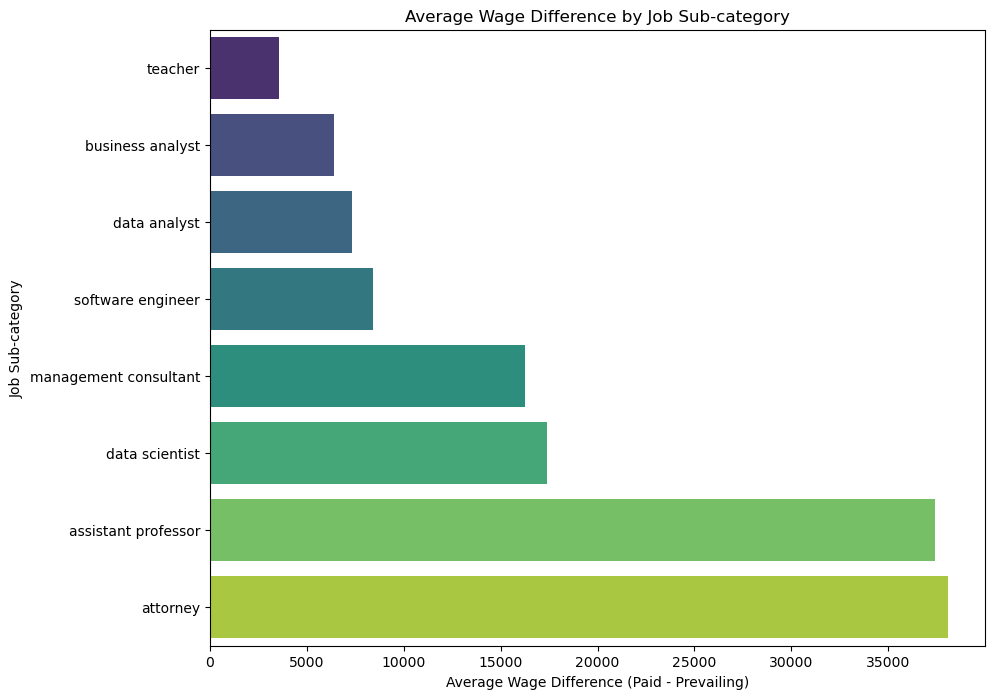

In [40]:
# Ensure PAID_WAGE_PER_YEAR and PREVAILING_WAGE_PER_YEAR are numeric
salary_data['PAID_WAGE_PER_YEAR'] = pd.to_numeric(salary_data['PAID_WAGE_PER_YEAR'], errors='coerce')
salary_data['PREVAILING_WAGE_PER_YEAR'] = pd.to_numeric(salary_data['PREVAILING_WAGE_PER_YEAR'], errors='coerce')

# Calculate the wage difference
salary_data['WAGE_DIFFERENCE'] = salary_data['PAID_WAGE_PER_YEAR'] - salary_data['PREVAILING_WAGE_PER_YEAR']

# Group by job sub-category and calculate the average wage difference
job_category_analysis = salary_data.groupby('JOB_TITLE_SUBGROUP')['WAGE_DIFFERENCE'].mean().sort_values()

# Print the job sub-category analysis
print("Job Sub-category Wage Analysis:")
print(job_category_analysis)

# Visualize the data using a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=job_category_analysis.values, y=job_category_analysis.index, palette="viridis")
plt.title("Average Wage Difference by Job Sub-category")
plt.xlabel("Average Wage Difference (Paid - Prevailing)")
plt.ylabel("Job Sub-category")
plt.show()

Employer Wage Analysis (Top 10 Underpaying Companies):
EMPLOYER_NAME
HAROLD GOLD, INC.                                    -31865.6
CORVEL CORPORATION                                   -22027.5
STATE OF NEW MEXICO PUBLID REGULATION COMMISSION I   -20218.0
ADVANCED INFORMATION MANAGEMENT TECHNOLOGY PARTNER   -18580.0
ELITE CONSORTIUM GROUP, INC                          -14642.0
PRIMETIME TEACHERS, LLC                              -14480.0
FUTUREDONTICS                                        -13539.5
KNOXVILLE CHRISTIAN SCHOOL                           -13530.0
RAVIG INC                                            -13000.0
GLENTEK, INC.                                        -11627.2
Name: WAGE_DIFFERENCE, dtype: float64

Employer Wage Analysis (Top 10 Overpaying Companies):
EMPLOYER_NAME
LOAD DYNAMIX, INC.                                    398396.0
DIXIE STATE COLLEGE OF UTAH                           425693.5
ALIASWIRE, INC.                                       442554.0
AUTISTIC TREATM

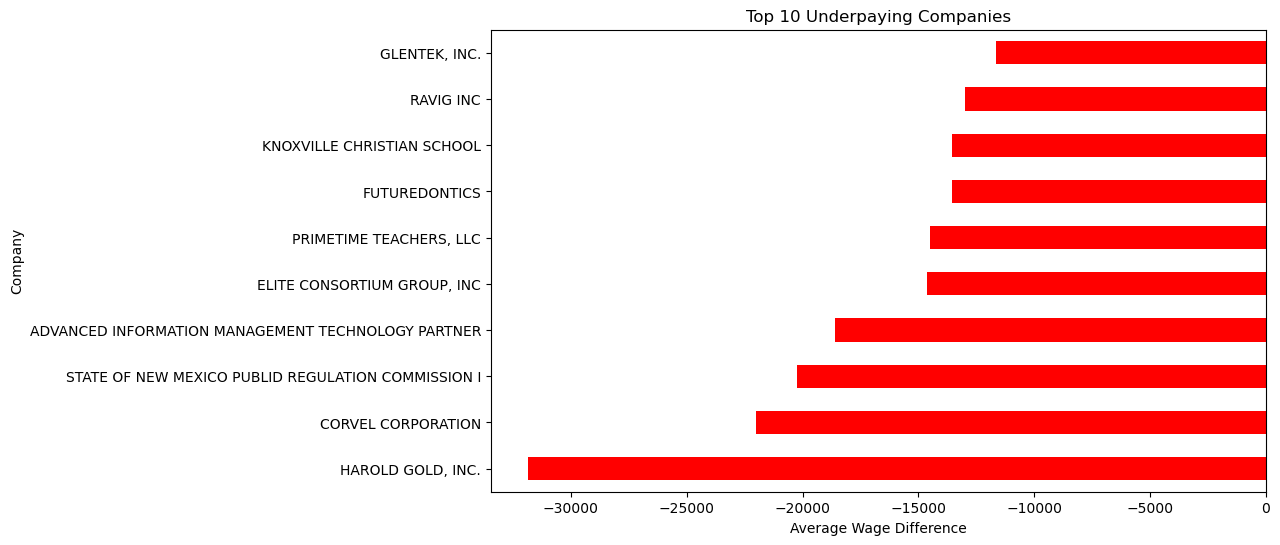

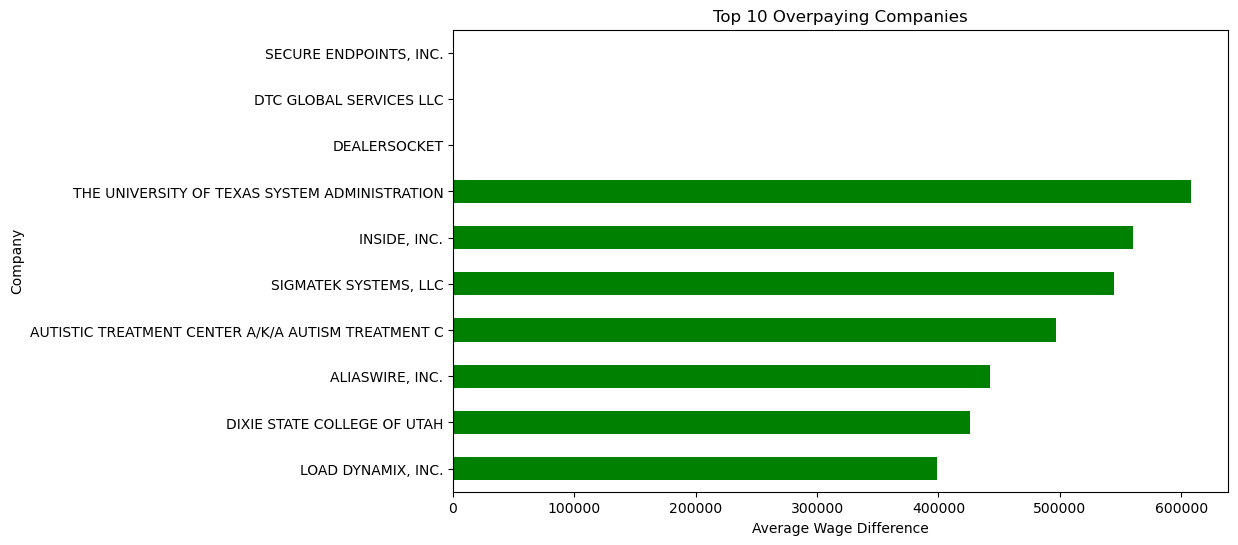

In [42]:
# Ensure that PAID_WAGE_PER_YEAR and PREVAILING_WAGE_PER_YEAR are numeric
salary_data['PAID_WAGE_PER_YEAR'] = pd.to_numeric(salary_data['PAID_WAGE_PER_YEAR'], errors='coerce')
salary_data['PREVAILING_WAGE_PER_YEAR'] = pd.to_numeric(salary_data['PREVAILING_WAGE_PER_YEAR'], errors='coerce')

# Calculate the wage difference between paid and prevailing wages
salary_data['WAGE_DIFFERENCE'] = salary_data['PAID_WAGE_PER_YEAR'] - salary_data['PREVAILING_WAGE_PER_YEAR']

# Group by employer to calculate the average wage difference
employer_analysis = salary_data.groupby('EMPLOYER_NAME')['WAGE_DIFFERENCE'].mean().sort_values()

# Display the results
print("Employer Wage Analysis (Top 10 Underpaying Companies):")
print(employer_analysis.head(10))  # Top 10 underpaying companies

print("\nEmployer Wage Analysis (Top 10 Overpaying Companies):")
print(employer_analysis.tail(10))  # Top 10 overpaying companies

# Visualize the results using a bar chart for top 10 overpaying and underpaying companies
top_underpaying = employer_analysis.head(10)
top_overpaying = employer_analysis.tail(10)

# Plot Top 10 Underpaying Companies
top_underpaying.plot(kind='barh', figsize=(10, 6), color='red')
plt.title("Top 10 Underpaying Companies")
plt.xlabel("Average Wage Difference")
plt.ylabel("Company")
plt.show()

# Plot Top 10 Overpaying Companies
top_overpaying.plot(kind='barh', figsize=(10, 6), color='green')
plt.title("Top 10 Overpaying Companies")
plt.xlabel("Average Wage Difference")
plt.ylabel("Company")
plt.show()


Top 10 States with Highest Average Wage Differences:
WORK_STATE
NEW YORK         17131.415110
PUERTO RICO      17711.404565
UTAH             17972.417866
WISCONSIN        19245.447139
KANSAS           21175.063748
KENTUCKY         21749.918988
ALABAMA          22315.814163
ARKANSAS         26764.210019
MISSISSIPPI      34114.420596
WEST VIRGINIA    56254.551711
Name: WAGE_DIFFERENCE, dtype: float64

Top 10 States with Lowest Average Wage Differences:
WORK_STATE
GUAMAM                         0.000000
PALAU                         13.000000
NORTHERN MARIANA ISLANDS    1670.000000
GUAM                        3069.136364
NEW JERSEY                  5220.189226
DELAWARE                    5542.859686
VIRGIN ISLANDS              5598.045980
OREGON                      5598.046277
VERMONT                     5753.888651
VIRGINIA                    6326.607971
Name: WAGE_DIFFERENCE, dtype: float64


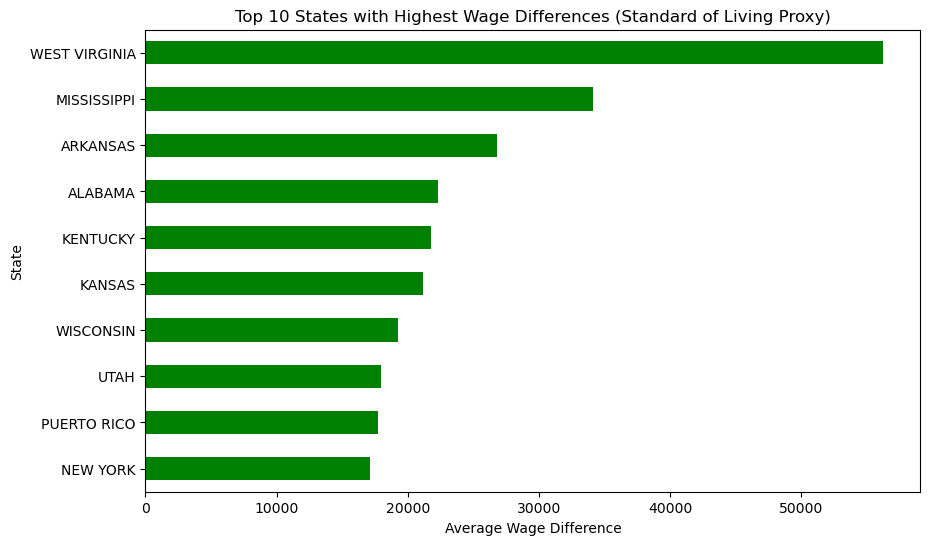

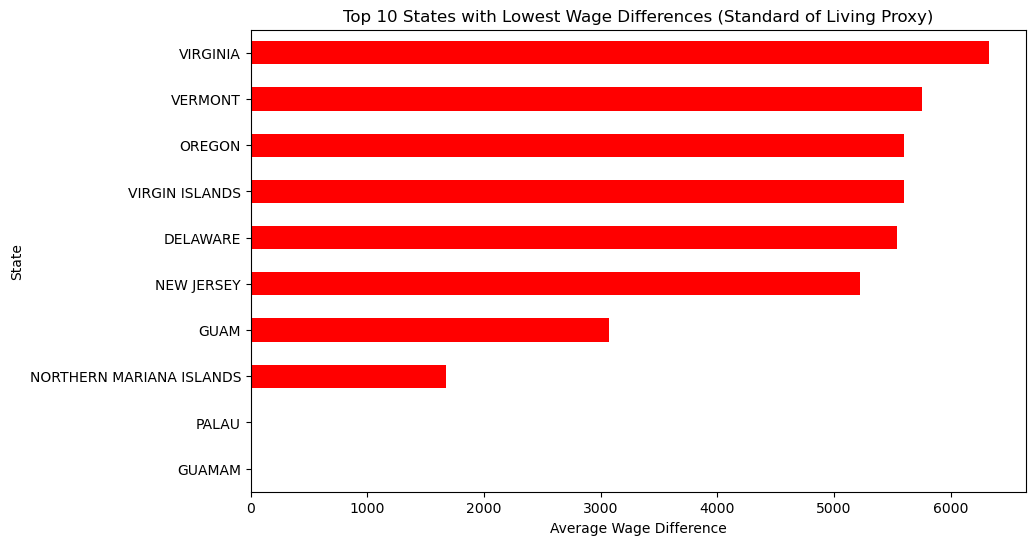

In [48]:
# Group by state to calculate the mean wage difference
state_wage_analysis = salary_data.groupby('WORK_STATE')['WAGE_DIFFERENCE'].mean().sort_values()

# Identify the top 10 states with the highest and lowest wage differences
top_states = state_wage_analysis.tail(10)
bottom_states = state_wage_analysis.head(10)

# Display the results
print("Top 10 States with Highest Average Wage Differences:")
print(top_states)

print("\nTop 10 States with Lowest Average Wage Differences:")
print(bottom_states)

# Visualization for insights
# Plot for states with the highest wage differences
top_states.plot(kind='barh', figsize=(10, 6), color='green')
plt.title("Top 10 States with Highest Wage Differences (Standard of Living Proxy)")
plt.xlabel("Average Wage Difference")
plt.ylabel("State")
plt.show()

# Plot for states with the lowest wage differences
bottom_states.plot(kind='barh', figsize=(10, 6), color='red')
plt.title("Top 10 States with Lowest Wage Differences (Standard of Living Proxy)")
plt.xlabel("Average Wage Difference")
plt.ylabel("State")
plt.show()
